In [ ]:
# Start writing code here...
#test 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/Pravallika-Myneni/world_data_league_2022/main/stage_one/data_1/weekly_holiday_weather_pollution_garbage_data_2014-2019.csv", index_col =0)
df_1['Load Type'] = df_1['Load Type'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Load Type'] = df_1['Load Type'].apply(lambda x: max(set(x), key = x.count))

df_1['Route Number'] = df_1['Route Number'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Route Number'] = df_1['Route Number'].apply(lambda x: max(set(x), key = x.count))


df_1['Route Type'] = df_1['Route Type'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Route Type'] = df_1['Route Type'].apply(lambda x: max(set(x), key = x.count))

df_1['Dropoff Site'] = df_1['Dropoff Site'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Dropoff Site'] = df_1['Dropoff Site'].apply(lambda x: max(set(x), key = x.count))
df_1.head(1)

,Date,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Year,holidays,tavg,tmin,tmax,prcp,snow,wspd,pres,tsun
0,2014-01-05,'GARBAGE COLLECTIONS',9621104.0,'TDS LANDFILL','GARBAGE COLLECTION','BU06',2014,1,8.0,-2.1,21.7,0.0,0.0,8.7,1023.5,0.0


For modelling, for the columns: Load Type, Dropoff Site, Route Type, Route Number, lets use the most common element

ALT: use set of list

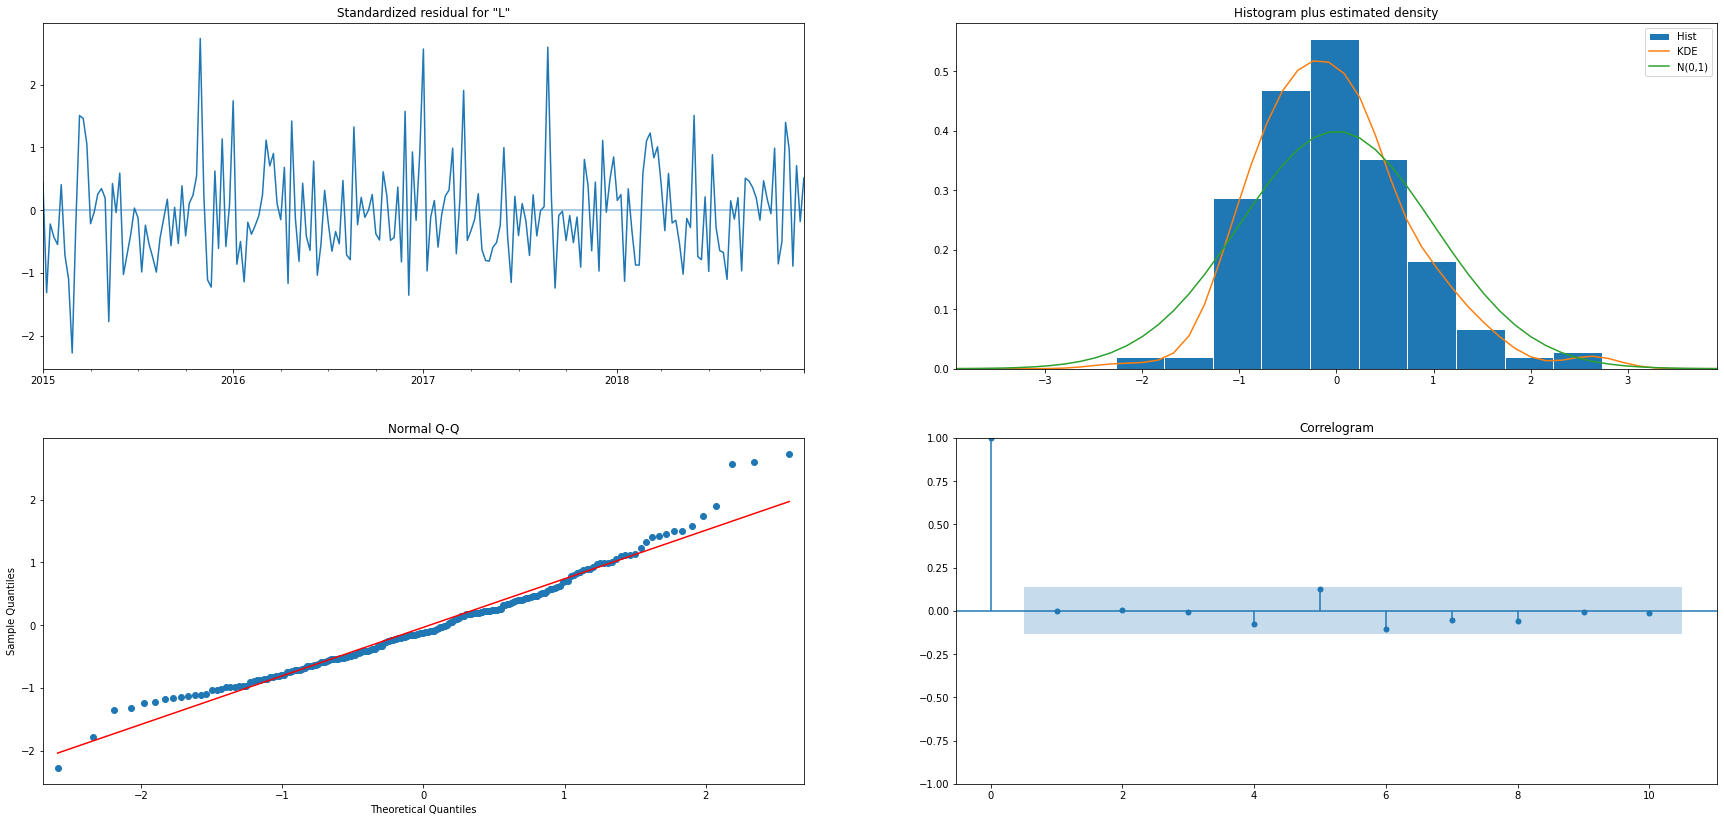

In [17]:
results.plot_diagnostics(figsize=(30, 14))
plt.show()

In [18]:
pred0 = results.get_prediction(start='2018-12-23', dynamic=False)
pred0_ci = pred0.conf_int()

In [19]:
pred0_ci

,lower Load Weight,upper Load Weight
2018-12-23,7.736142e+06,1.165690e+07
2018-12-30,7.545699e+06,1.146646e+07


In [20]:
pred1 = results.get_prediction(start='2018-12-23', dynamic=True)
pred1_ci = pred0.conf_int()

In [21]:
pred1_ci

,lower Load Weight,upper Load Weight
2018-12-23,7.736142e+06,1.165690e+07
2018-12-30,7.545699e+06,1.146646e+07


In [22]:
pred2 = results.get_forecast('2019-12-29')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-01-06':'2019-12-29'])

2019-01-06    9.570463e+06
2019-01-13    9.516055e+06
2019-01-20    9.767899e+06
2019-01-27    9.910821e+06
2019-02-03    9.747406e+06
2019-02-10    1.008296e+07
2019-02-17    1.027717e+07
2019-02-24    1.027026e+07
2019-03-03    1.006349e+07
2019-03-10    9.696927e+06
2019-03-17    9.853319e+06
2019-03-24    9.859574e+06
2019-03-31    9.467763e+06
2019-04-07    9.565331e+06
2019-04-14    9.683380e+06
2019-04-21    9.832201e+06
2019-04-28    9.601612e+06
2019-05-05    1.007112e+07
2019-05-12    1.001952e+07
2019-05-19    1.000412e+07
2019-05-26    9.928930e+06
2019-06-02    9.579340e+06
2019-06-09    9.805232e+06
2019-06-16    9.780044e+06
2019-06-23    9.419058e+06
2019-06-30    9.531944e+06
2019-07-07    9.638185e+06
2019-07-14    9.896064e+06
2019-07-21    9.526565e+06
2019-07-28    9.816367e+06
2019-08-04    9.974813e+06
2019-08-11    1.018755e+07
2019-08-18    9.931267e+06
2019-08-25    9.754849e+06
2019-09-01    9.811627e+06
2019-09-08    9.865708e+06
2019-09-15    9.575538e+06
2

In [23]:
prediction = pred2.predicted_mean['2019-01-06':'2019-12-29'].values
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data - prediction) / test_data)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 2019 is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast of year 2019 is 8.84%


## XGBoost

In [26]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 16 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import plot_importance, plot_tree
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds = 50,
        verbose = False)

NameError: name 'X_train' is not defined

##

## Linear Regression

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a1cabe9-69f7-4a67-be18-e232e1feb2b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>